In [3]:
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [41]:
#covid = pd.read_csv("Covid_2020.csv")
df = pd.read_csv("./datasets/COTAHIST_A2015_2021.csv")
detail = pd.read_excel("./datasets/IPO_details.xlsx")
ibov = pd.read_csv('./datasets/COTAHIST_IBOV.csv')

In [5]:
tickers = list(detail.Tickers)
abertura = list(detail.Preco_fixado)
dict_tickers = dict(zip(tickers, abertura))

In [44]:
ibov

,Data,Último,Var%,Cumulative
0,2015-06-05,52973.37,-0.0103,0.000000
1,2015-06-08,52809.63,-0.0031,-0.309099
2,2015-06-09,52815.99,0.0001,-0.297093
3,2015-06-10,53876.44,0.0201,1.704762
4,2015-06-11,53688.51,-0.0035,1.349999
...,...,...,...,...
1481,2021-06-02,129601.44,0.0104,144.653946
1482,2021-06-04,130125.78,0.0040,145.643764
1483,2021-06-07,130776.27,0.0050,146.871721
1484,2021-06-08,129787.11,-0.0076,145.004443


In [8]:
datedf = df["date"]
datedf.reset_index(drop = True)
datedf = datedf.drop_duplicates()

In [9]:
variation = df.copy()
variation

,date,codneg,preabe,preult
0,2015-06-05,WIZS3,13.60,13.90
1,2015-06-08,WIZS3,14.11,13.78
2,2015-06-09,WIZS3,13.78,13.65
3,2015-06-10,WIZS3,13.70,14.00
4,2015-06-11,WIZS3,14.01,14.26
...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45
22519,2021-06-09,VAMO3,52.41,51.96
22520,2021-06-09,VIVA3,31.37,31.66
22521,2021-06-09,WEST3,8.83,8.77


In [10]:
#variation[variation.codneg=='BIDI4']

In [11]:
variation['var'] = variation.apply(lambda x: (x.preult - x.preabe)/x.preabe, axis = 1)

In [12]:
variation

,date,codneg,preabe,preult,var
0,2015-06-05,WIZS3,13.60,13.90,0.022059
1,2015-06-08,WIZS3,14.11,13.78,-0.023388
2,2015-06-09,WIZS3,13.78,13.65,-0.009434
3,2015-06-10,WIZS3,13.70,14.00,0.021898
4,2015-06-11,WIZS3,14.01,14.26,0.017844
...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586
22520,2021-06-09,VIVA3,31.37,31.66,0.009245
22521,2021-06-09,WEST3,8.83,8.77,-0.006795


In [48]:
ibov['vol_media_diaria'] = 0
ibov['vol_media_anual'] = 0
ibov['codneg'] = 'ibov'

In [50]:
ibov

,Data,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,indice,codneg
0,2015-06-05,52973.37,-0.0103,0.000000,0,0,0,ibov
1,2015-06-08,52809.63,-0.0031,-0.309099,0,0,1,ibov
2,2015-06-09,52815.99,0.0001,-0.297093,0,0,2,ibov
3,2015-06-10,53876.44,0.0201,1.704762,0,0,3,ibov
4,2015-06-11,53688.51,-0.0035,1.349999,0,0,4,ibov
...,...,...,...,...,...,...,...,...
1481,2021-06-02,129601.44,0.0104,144.653946,0,0,1481,ibov
1482,2021-06-04,130125.78,0.0040,145.643764,0,0,1482,ibov
1483,2021-06-07,130776.27,0.0050,146.871721,0,0,1483,ibov
1484,2021-06-08,129787.11,-0.0076,145.004443,0,0,1484,ibov


In [13]:
variation['vol_media_diaria'] = 0
variation['vol_media_anual'] = 0
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0,0
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0,0
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0,0
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0,0
...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0,0
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0,0
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0,0
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0,0


In [47]:
ibov['indice'] = list(ibov.index)
ibov

,Data,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,52973.37,-0.0103,0.000000,0,0,0
1,2015-06-08,52809.63,-0.0031,-0.309099,0,0,1
2,2015-06-09,52815.99,0.0001,-0.297093,0,0,2
3,2015-06-10,53876.44,0.0201,1.704762,0,0,3
4,2015-06-11,53688.51,-0.0035,1.349999,0,0,4
...,...,...,...,...,...,...,...
1481,2021-06-02,129601.44,0.0104,144.653946,0,0,1481
1482,2021-06-04,130125.78,0.0040,145.643764,0,0,1482
1483,2021-06-07,130776.27,0.0050,146.871721,0,0,1483
1484,2021-06-08,129787.11,-0.0076,145.004443,0,0,1484


In [14]:
variation['indice'] = list(variation.index)
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0,0,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0,0,1
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0,0,2
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0,0,3
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0,0,4
...,...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0,0,22518
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0,0,22519
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0,0,22520
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0,0,22521


In [16]:
def vol_ant(data, ativo):
    data = data[data.codneg == ativo]
    abertura = dict_tickers[ativo]

    if data.index.max() == 0:
        vol = np.array([data['var'][0], (data['preabe'][0] - abertura)/abertura]).std()  
        return vol
    else:
        vol = data['var'].std()
        return vol

In [51]:
def vol_ant_ibov(data, ativo):
    data = data[data.codneg == ativo]
    vol = data['Var%'].std()
    return vol

In [52]:
%%time
ibov['vol_media_diaria'] = ibov.apply(lambda x: vol_ant_ibov(ibov[:x['indice']+1],'ibov' ), axis = 1)
ibov.drop(columns='indice')
ibov['vol_media_anual'] = ibov['vol_media_diaria']*(252**(1/2))
ibov

Wall time: 826 ms


,Data,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,indice,codneg
0,2015-06-05,52973.37,-0.0103,0.000000,NaN,NaN,0,ibov
1,2015-06-08,52809.63,-0.0031,-0.309099,0.005091,0.080820,1,ibov
2,2015-06-09,52815.99,0.0001,-0.297093,0.005327,0.084558,2,ibov
3,2015-06-10,53876.44,0.0201,1.704762,0.013015,0.206605,3,ibov
4,2015-06-11,53688.51,-0.0035,1.349999,0.011509,0.182693,4,ibov
...,...,...,...,...,...,...,...,...
1481,2021-06-02,129601.44,0.0104,144.653946,0.017082,0.271166,1481,ibov
1482,2021-06-04,130125.78,0.0040,145.643764,0.017076,0.271078,1482,ibov
1483,2021-06-07,130776.27,0.0050,146.871721,0.017071,0.270992,1483,ibov
1484,2021-06-08,129787.11,-0.0076,145.004443,0.017067,0.270923,1484,ibov


In [17]:
%%time
variation['vol_media_diaria'] = variation.apply(lambda x: vol_ant(variation[:x['indice']+1],x.codneg ), axis = 1)
variation.drop(columns='indice')
variation['vol_media_anual'] = variation['vol_media_diaria']*(252**(1/2))
variation

Wall time: 24.1 s


,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0.040471,0.642457,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0.032136,0.510136,1
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0.023280,0.369566,2
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0.022884,0.363279,3
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0.020932,0.332281,4
...,...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0.027733,0.440245,22518
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0.026448,0.419845,22519
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0.039168,0.621774,22520
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0.039820,0.632130,22521


In [19]:
ticker = 'WIZS3'
v_wiz = variation[variation.codneg==ticker].copy()
v_wiz['vol'] = 0
count = 0
abertura = dict_tickers[ticker]
for i in list(v_wiz.index):
    
    if i == 0:
        v_wiz.loc[i,'vol'] = np.array([v_wiz.loc[i,'vol'], (abertura - v_wiz.loc[i,'preabe'])/abertura ]).std()
        continue

    v_wiz.loc[i,'vol'] = v_wiz[:i+1]['var'].std()

v_wiz = v_wiz.rename(columns={'vol':'vol_media_diaria'})
v_wiz['vol_media_anual'] = v_wiz['vol_media_diaria']*(252**(1/2))

In [20]:
var_by_day = variation.pivot_table(values='vol_media_anual', index= 'date', columns='codneg')

In [21]:
var_by_day

codneg,AALR3,AERI3,ALLD3,ALPK3,AMBP3,AVLL3,AZUL4,BIDI4,BKBR3,BLAU3,...,RRRP3,SBFG3,SEQL3,SOJA3,SOMA3,TFCO4,VAMO3,VIVA3,WEST3,WIZS3
date,,,,,,,,,,,,,,,,,,,,,
2015-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642457
2015-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510136
2015-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.369566
2015-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363279
2015-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,0.384266,0.563092,0.446010,0.301862,0.311554,0.554704,0.507384,0.613119,0.437114,0.325028,...,0.444010,0.579867,0.429596,0.465187,0.425465,0.445608,0.427815,0.624751,0.645429,0.417926
2021-06-04,0.384102,0.561647,0.452346,0.302903,0.311045,0.552274,0.507211,0.612714,0.437041,0.319928,...,0.442921,0.579324,0.428274,0.455832,0.424521,0.444236,0.425914,0.623981,0.644301,0.417844
2021-06-07,0.384476,0.559790,0.452709,0.302710,0.310546,0.549879,0.507160,0.612423,0.436785,0.321713,...,0.442185,0.578777,0.427018,0.447255,0.423530,0.443181,0.423607,0.623269,0.640272,0.417759


In [22]:
var_by_day.iloc[0]

codneg
AALR3         NaN
AERI3         NaN
ALLD3         NaN
ALPK3         NaN
AMBP3         NaN
           ...   
TFCO4         NaN
VAMO3         NaN
VIVA3         NaN
WEST3         NaN
WIZS3    0.642457
Name: 2015-06-05, Length: 69, dtype: float64

In [23]:
var_by_day_mean = var_by_day.mean(axis = 1)
var_by_day_mean = pd.DataFrame(data=var_by_day_mean, columns=['media_volatilidade'])
rent_by_day_mean = var_by_day_mean.reset_index(drop=False)
rent_by_day_mean

,date,media_volatilidade
0,2015-06-05,0.642457
1,2015-06-08,0.510136
2,2015-06-09,0.369566
3,2015-06-10,0.363279
4,2015-06-11,0.332281
...,...,...
1481,2021-06-02,0.464182
1482,2021-06-04,0.462800
1483,2021-06-07,0.461412
1484,2021-06-08,0.460935


In [36]:
rent_by_day_mean[(rent_by_day_mean.date >= '2020-01-01') & (rent_by_day_mean.date <= '2020-12-31')]

,date,media_volatilidade
1130,2020-01-02,0.329767
1131,2020-01-03,0.329463
1132,2020-01-06,0.329377
1133,2020-01-07,0.329521
1134,2020-01-08,0.329931
...,...,...
1374,2020-12-22,0.472724
1375,2020-12-23,0.475454
1376,2020-12-28,0.473107
1377,2020-12-29,0.474499


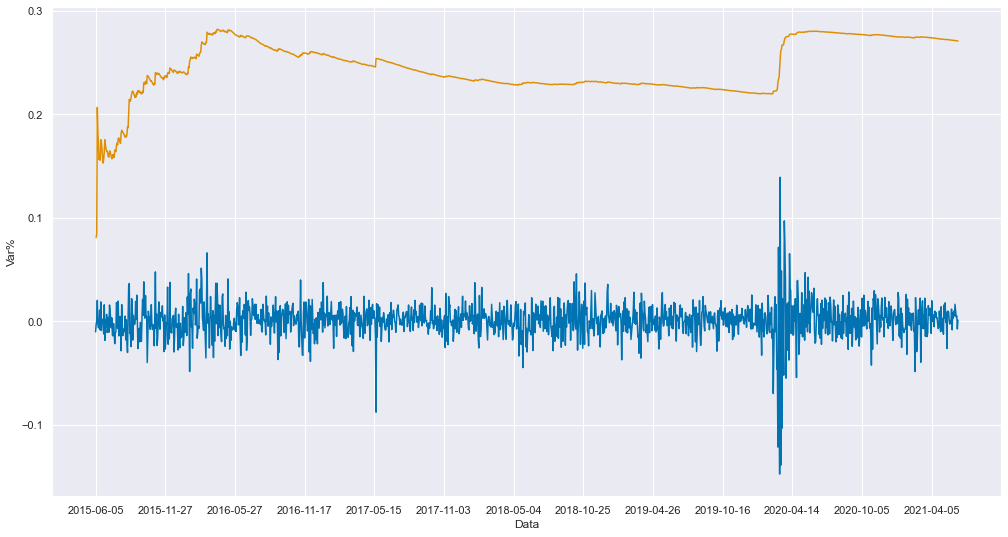

In [57]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
#axes = sns.lineplot( data=rent_by_day_mean, x='date', y='media_volatilidade')
axes = sns.lineplot( data=ibov, x='Data', y='Var%')
axes2 = sns.lineplot( data=ibov, x='Data', y='vol_media_anual')
axes.xaxis.set_major_locator(loc)

In [25]:
var_by_day.iloc[400].std()

0.003215478485831853

In [26]:
def volatility(period, df, df_detail, df_ticker = "codneg",
               open_name="preabe", closure_name="preult",
               dict_tickers = dict_tickers, set_year=0):
    
    all_volatility   = {}
    
    for ticker in dict_tickers:
        
        volatility_array = np.array([])
        volatility_array_nan = np.array([])
        
        price_fixing  = dict_tickers[ticker]
        open_price    = df [df [df_ticker] == ticker][open_name].reset_index(drop = True)
        closure_price = df [df [df_ticker] == ticker][closure_name].reset_index(drop = True)
        
        volatility_array = np.append(volatility_array, (closure_price.iloc[0] - price_fixing) / price_fixing)
        
        if period > 1:
        
            for t in range(1, period):

                try:
                    volatility_array = np.append(volatility_array, (closure_price.iloc[t] - open_price.iloc[t]) / open_price.iloc[t])
                    volatility_array_nan = np.append(volatility_array, (closure_price.iloc[t] - open_price.iloc[t]) / open_price.iloc[t])
                    
                except:
                    volatility_array = np.append(volatility_array_nan, np.nan)

        all_volatility[ticker] = (volatility_array.std()*mt.sqrt(252))
               
        
    return all_volatility

    

In [27]:
def vol_df(datedf, df, df_detail, df_ticker = "codneg",
               open_name="preabe", closure_name="preult",
               dict_tickers = dict_tickers):
    
    vol_df = pd.DataFrame()
    
    for ticker in dict_tickers:
        
        array_rent = np.array([])
        array_vol = {}    
        
        for date in datedf:
            
            try:
                
                linha = df[df["date"] == date, df[df_ticker] == ticker]
                
                rentability = (linha[closure_price] - linha[open_price]) / linha[open_price]
                
                array_rent = np.append(array_rent, rentability)
                
                array_vol[date] = rentability.std()*mt.sqrt(252)
            
            except:
                array_vol[date] = np.nan
        
        vol_df[ticker] = pd.Series(array_vol)
        
    return vol_df
            

In [28]:
x = vol_df(datedf, df, detail)